# Personality Prediction: Extrovert vs Introvert
This notebook predicts personality types (Extrovert or Introvert) using behavioral data and machine learning classifiers.

## 1. Importing Required Libraries
We begin by importing essential libraries for data analysis, visualization, preprocessing, and model building.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,StackingClassifier
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

## 2. Loading the Dataset
We load the training and test datasets and do initial adjustments like dropping unnecessary columns.

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
ids = test.id
train = train.iloc[:,1:]
test = test.iloc[:,1:]

## 3. Exploring the Training Data
Let's display the first few rows of the training data to understand its structure and the features involved.

In [3]:
Y = train.Personality
train = train.iloc[:,:-1]
train

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,0.0,No,6.0,4.0,No,15.0,5.0
1,1.0,No,7.0,3.0,No,10.0,8.0
2,6.0,Yes,1.0,0.0,NaN,3.0,0.0
3,3.0,No,7.0,3.0,No,11.0,5.0
4,1.0,No,4.0,4.0,No,13.0,NaN
...,...,...,...,...,...,...,...
18519,3.0,No,7.0,3.0,No,9.0,7.0
18520,1.0,NaN,6.0,7.0,No,6.0,5.0
18521,7.0,Yes,1.0,1.0,Yes,1.0,NaN
18522,NaN,Yes,1.0,0.0,Yes,5.0,2.0


## 4. Handling Missing Values & Label Encoding
We'll handle missing values using imputers and encode categorical variables (like 'Stage_fear') using `LabelEncoder`.

In [4]:
transformer = ColumnTransformer(
    transformers = [
        ("trf1", SimpleImputer(strategy='mean'), ["Time_spent_Alone","Social_event_attendance","Going_outside",
                                                  "Friends_circle_size","Post_frequency"]),
        ("trf2",SimpleImputer(strategy="most_frequent"),["Stage_fear","Drained_after_socializing"]),    
    ],
    remainder = "passthrough"
)
le = LabelEncoder()
train['Stage_fear'] = le.fit_transform(train.Stage_fear)
train['Drained_after_socializing'] =le.fit_transform(train.Drained_after_socializing)
test['Stage_fear'] = le.fit_transform(test.Stage_fear)
test['Drained_after_socializing'] =le.fit_transform(test.Drained_after_socializing)
Y = le.fit_transform(Y)


## 5. Hyperparameter Tuning and Advanced Modeling Techniques

In this section, we will:

- Use **GridSearchCV** to perform hyperparameter tuning for models like SVM, Random Forest, etc.
- Implement **Ensemble Models** like:
  - **Stacking Classifier**: Combines predictions from multiple classifiers using a meta-classifier.
  - **Boosting Techniques**: Use models such as AdaBoost and Gradient Boosting to improve performance by focusing on difficult samples.

These techniques help increase the robustness and accuracy of our personality prediction model.


In [6]:
train = new.fit_transform(train)
train = pd.DataFrame(train)
test = new.fit_transform(test)
test = pd.DataFrame(test)
train

,0,1,2,3,4,5,6
0,0.0,6.0,4.0,15.0,5.0,0.0,0.0
1,1.0,7.0,3.0,10.0,8.0,0.0,0.0
2,6.0,1.0,0.0,3.0,0.0,1.0,2.0
3,3.0,7.0,3.0,11.0,5.0,0.0,0.0
4,1.0,4.0,4.0,13.0,6.1,0.0,0.0
...,...,...,...,...,...,...,...
18519,3.0,7.0,3.0,9.0,7.0,0.0,0.0
18520,1.0,6.0,7.0,6.0,5.0,2.0,0.0
18521,7.0,1.0,1.0,1.0,1.0,1.0,1.0
18522,6.9,1.0,0.0,5.0,2.0,1.0,1.0


<Axes: xlabel='0', ylabel='1'>

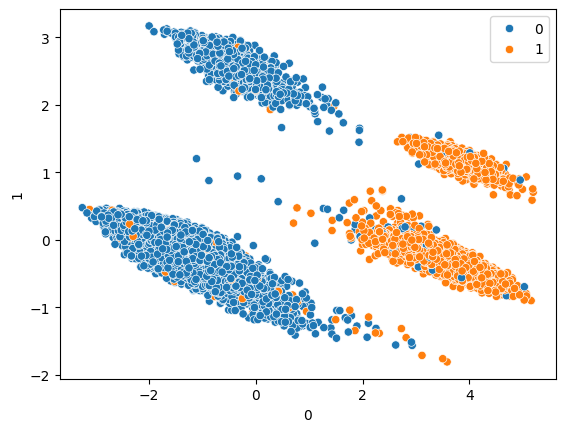

In [7]:
pca = PCA(n_components=2)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train)
X_pca = pca.fit_transform(X_scaled)
x_pca = pd.DataFrame(X_pca)
sns.scatterplot(x=x_pca[0],y=x_pca[1],hue=Y)

In [9]:
params = {
    'n_estimators':[5,10,15,20,25,30,35,40],
    'max_depth':[4,5,6,7,8,9,10],
    'max_samples':[0.2,0.3,0.4,0.5,0.6,0.7],
    'max_features':[0.2,0.3,0.4,0.5],
}
RF = GridSearchCV(
    RandomForestClassifier(),
    param_grid = params,
    cv = 5,
    n_jobs=-1
)
RF.fit(train,Y)
RF.best_score_

np.float64(0.9693913571934487)

In [10]:
RF.best_params_

{'max_depth': 6, 'max_features': 0.2, 'max_samples': 0.5, 'n_estimators': 15}

In [11]:
rf =  RandomForestClassifier(max_depth = 6, max_features = 0.4, max_samples = 0.3, n_estimators = 10)
cross_val_score(rf,train,Y,cv = 10).mean()

np.float64(0.9689590110718826)

In [12]:
params = {
    'n_estimators':[25,50,100,200],
    'learning_rate':[0.01,0.1,1]
}
AD = GridSearchCV(
    AdaBoostClassifier(),
    param_grid = params,
    cv = 5,
    n_jobs=-1
)


In [13]:
AD.fit(train,Y)
AD.best_score_

np.float64(0.9691214225129196)

In [14]:
AD.best_params_

{'learning_rate': 1, 'n_estimators': 100}

In [15]:
ada =  AdaBoostClassifier(learning_rate = 1,n_estimators = 50)
cross_val_score(ada,train,Y,cv = 10).mean()

np.float64(0.9689590110718829)

In [16]:
params = {
    "loss" : ['log_loss','exponential'],
    "learning_rate": [0.01,0.01,0.1,1],
    "n_estimators"  : [5,10,15,20,25,50,100,200],   
    "max_leaf_nodes" : [2,4,6,10,12]
}
GD = GridSearchCV(
    GradientBoostingClassifier(),
    param_grid = params,
    cv = 5,
    n_jobs=-1
)

In [17]:
GD.fit(train,Y)
GD.best_score_

np.float64(0.969067441406307)

In [18]:
GD.best_params_

{'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_leaf_nodes': 4,
 'n_estimators': 50}

In [19]:
gd =  GradientBoostingClassifier(learning_rate = 0.1, max_leaf_nodes = 4, n_estimators = 50)
cross_val_score(gd,train,Y,cv = 10).mean()

np.float64(0.9689050153915371)

In [20]:
kn = KNeighborsClassifier(n_neighbors=37)
cross_val_score(kn,train,Y,cv = 10).mean()

np.float64(0.9686891492285582)

In [21]:

m1 = LogisticRegression()
m2 = RandomForestClassifier(max_depth = 6, max_features = 0.4, max_samples = 0.3, n_estimators = 10)
m3 = GaussianNB()
m4 = DecisionTreeClassifier()
m5 = SVC()
m6 = AdaBoostClassifier(learning_rate = 1,n_estimators = 50)
m7 = GradientBoostingClassifier(learning_rate = 0.1, max_leaf_nodes = 4, n_estimators = 50)

estimators = [('lg',m1),('rf',m2),('nb',m3),('dt',m4),('svc',m5),('ada',m6),('gb',m7)]
m8 = VotingClassifier(voting='hard', estimators= estimators)
m9 = KNeighborsClassifier(n_neighbors=30)

In [22]:
estimators = [('rf',m1),('nb',m2),('dt',m3),('svc',m4),('ada',m5),('gb',m6),('vt',m7),('kn',m8)]
stacking1 = StackingClassifier(estimators=estimators,final_estimator = m9,cv=10,n_jobs = -1)
cross_val_score(stacking1,train,Y,cv = 10).mean()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


np.float64(0.9687970531704467)

In [23]:
estimators = [('rf',m1),('nb',m2),('dt',m3),('svc',m4),('ada',m5),('gb',m6),('vt',m7),('kn',m8)]
stacking2 = StackingClassifier(estimators=estimators,final_estimator = m2,cv=10,n_jobs = -1)
cross_val_score(stacking2,train,Y,cv = 10).mean()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


np.float64(0.9686890618097556)